In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

In [6]:
df = pd.read_csv('data_clean.csv', index_col=0)

In [7]:
df.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [8]:
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [9]:
df.describe(include=object)

,Temp C,Month,Weather
count,158,158,155
unique,41,6,3
top,81,9,S
freq,11,34,59


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


# Dta type coversion 


In [11]:
df['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [12]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [13]:
# Replace method

In [14]:
df['Temp C'].replace('C',np.nan)

1      67
2      72
3      74
4      62
5      56
       ..
154    67
155    70
156    77
157    75
158    76
Name: Temp C, Length: 158, dtype: object

In [15]:
df['Month'].replace('May','5',inplace=True)

In [16]:
df['Month']= df['Month'].astype(int)

In [17]:
df['Month'].dtype

dtype('int32')

In [18]:
#Using pandas builtin in function 

In [19]:
df['Temp C'].dtype

dtype('O')

In [21]:
df['Temp C']= pd.to_numeric(df['Temp C'],errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   157 non-null    float64
 4   Month    158 non-null    int32  
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(1)
memory usage: 11.7+ KB


# Duplicates

In [23]:
# print thre duplicate values 

df[df.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [24]:
# get all the duplicate values 
# 2 Apporaches 

In [25]:
df[(df['Ozone'] == 14.0) & (df['Day'] == 28)]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,75.0,9,28,2010,75,S
157,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [26]:
df[df.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,75.0,9,28,2010,75,S
157,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df[df.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather


# Drop columns

In [29]:
df.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5,1,2010,67,S
2,36.0,118.0,8.0,72.0,5,2,2010,72,C
3,12.0,149.0,12.6,74.0,5,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5,4,2010,62,S
5,NaN,NaN,14.3,56.0,5,5,2010,56,S


# Rename the column 

In [30]:
df.rename(columns={'Solar.R' : 'Solar'}, inplace=True)

# checking the null values

In [31]:
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Temp C      1
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [32]:
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']= 250

sns.set_style('darkgrid')


<AxesSubplot:>

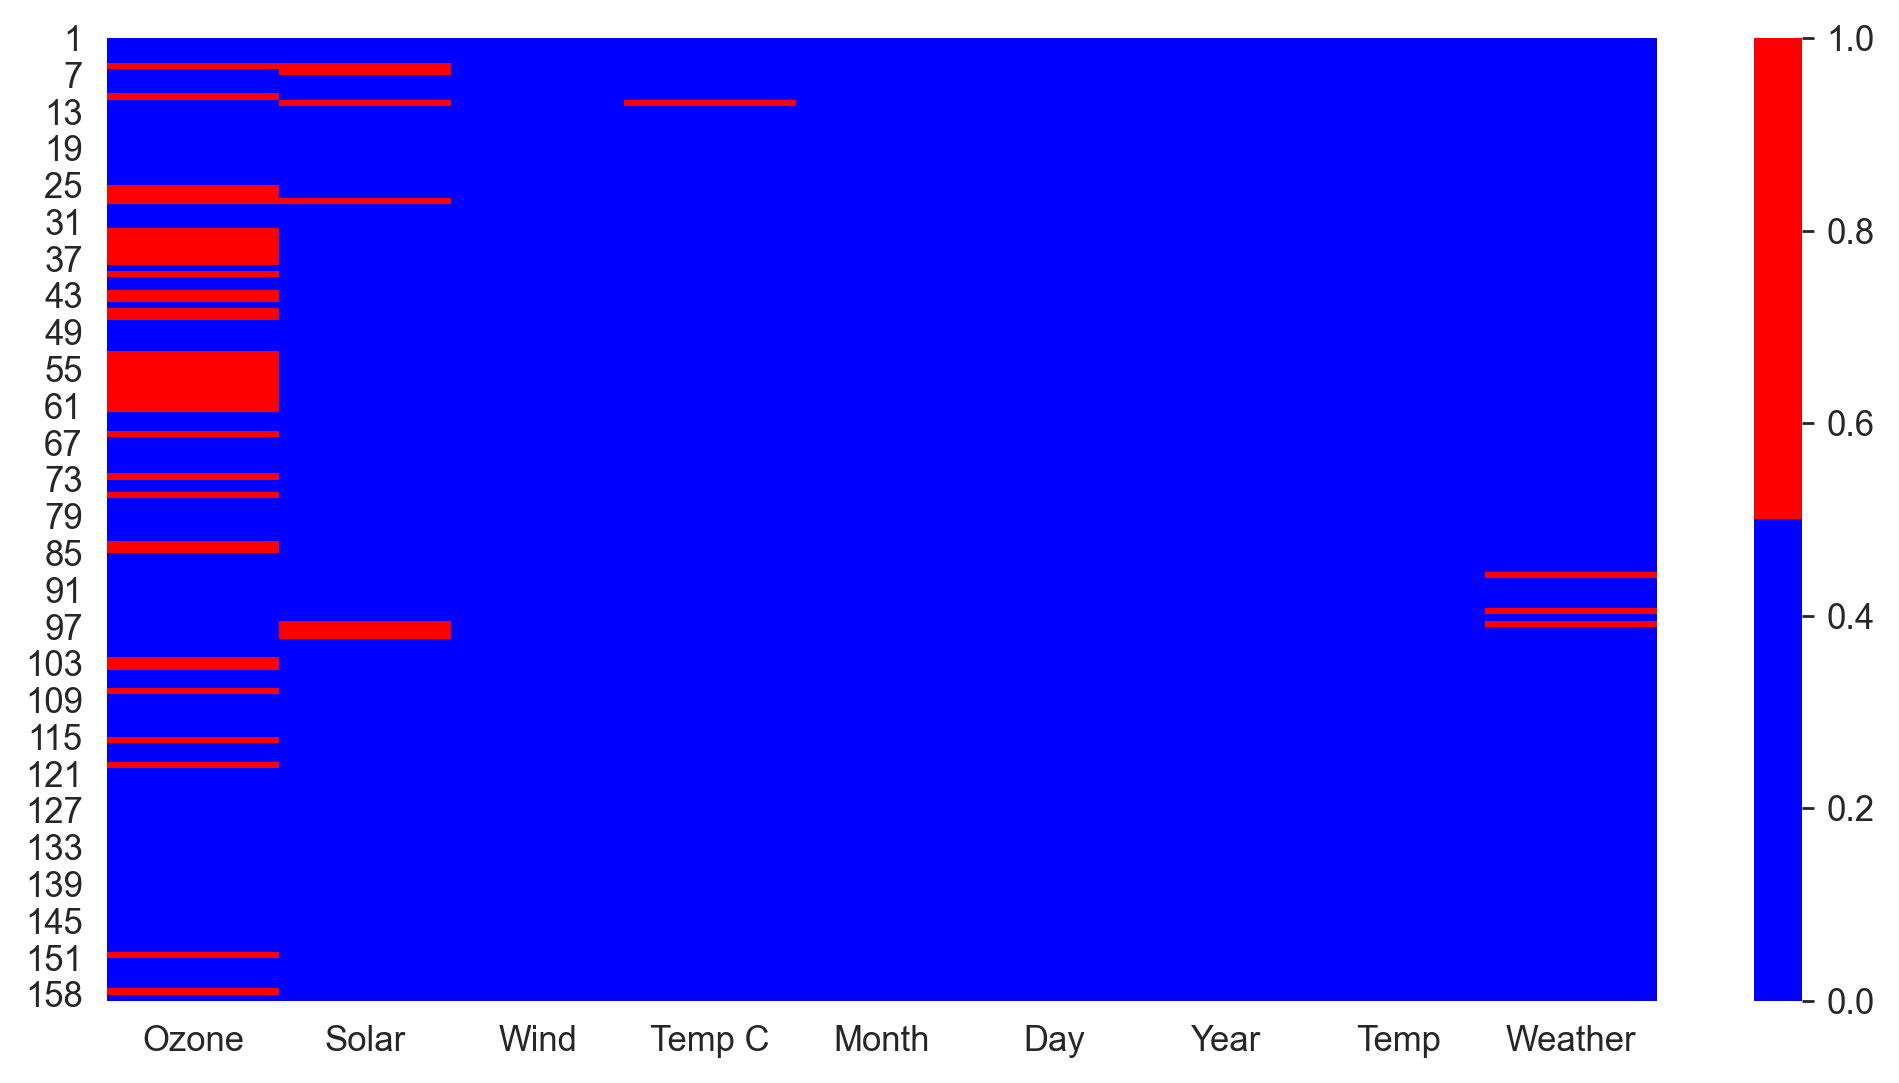

In [34]:
sns.heatmap(df.isna(),cmap=['blue','red'])

In [35]:
# Rules for making value imputation 

In [36]:
null_val =df.isna().sum()/len(df)*100

In [37]:
null_val

Ozone      24.203822
Solar       4.458599
Wind        0.000000
Temp C      0.636943
Month       0.000000
Day         0.000000
Year        0.000000
Temp        0.000000
Weather     1.910828
dtype: float64

In [39]:
median = df['Ozone'].median()

df['Ozone'].fillna(median,inplace=True)

In [40]:
df['Solar'].fillna(df['Solar'].median(),inplace=True)

In [41]:
df['Weather'].mode()

0    S
Name: Weather, dtype: object

In [42]:
df['Weather'].fillna(df['Weather'].mode()[0],inplace=True)

In [43]:
df.isna().sum()

Ozone      0
Solar      0
Wind       0
Temp C     1
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64